In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

import os
os.getcwd()



'C:\\Users\\Sakshi'

In [11]:
os.listdir()


['.anaconda',
 '.arduinoIDE',
 '.conda',
 '.condarc',
 '.continuum',
 '.eclipse',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.m2',
 '.matplotlib',
 '.ms-ad',
 '.p2',
 '.packettracer',
 '.vscode',
 '1.exe',
 'a.exe',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Cisco Packet Tracer 9.0.0',
 'configuration-Office365-x64.xml',
 'Cookies',
 'DataSize.class',
 'DataSize.java',
 'Documents',
 'Downloads',
 'eclipse',
 'Favorites',
 'IdeaProjects',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'MyJava',
 'NetHood',
 'New folder',
 'New folder (2)',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{636f96f5-ee3b-11f0-bc4e-c809a82ff165}.TM.blf',
 'NTUSER.DAT{636f96f5-ee3b-11f0-bc4e-c809a82ff165}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{636f96f5-ee3b-11f0-bc4e-c809a82ff165}.TMContainer00000000000000000002.regtrans-ms',
 'NTUSER.DAT{bd6d782b-ab5e-11ef-bbb6

In [13]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [15]:
df.shape


(1000, 9)

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [21]:
df['Date'] = pd.to_datetime(df['Date'])


In [23]:
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [25]:
df[['Total Amount','Quantity','Price per Unit']].agg(
    ['mean','median','std','min','max']
)


,Total Amount,Quantity,Price per Unit
mean,456.000000,2.514000,179.890000
median,135.000000,3.000000,50.000000
std,559.997632,1.132734,189.681356
min,25.000000,1.000000,25.000000
max,2000.000000,4.000000,500.000000


In [27]:
monthly_sales = df.groupby(
    df['Date'].dt.to_period('M')
)['Total Amount'].sum()


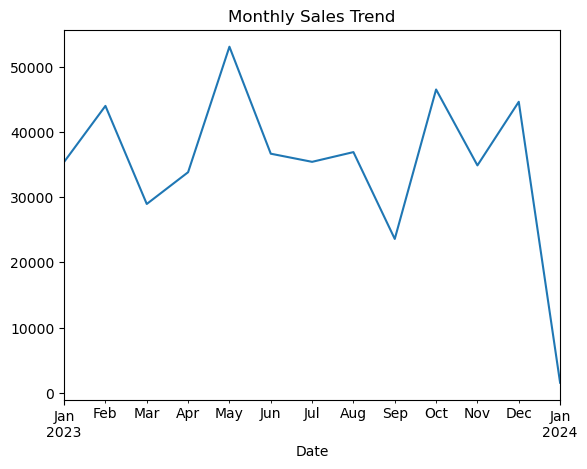

In [29]:
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.show()


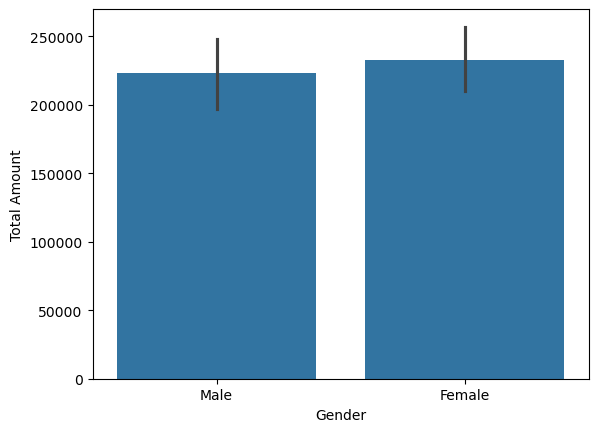

In [31]:
sns.barplot(
    x='Gender',
    y='Total Amount',
    data=df,
    estimator=sum
)
plt.show()


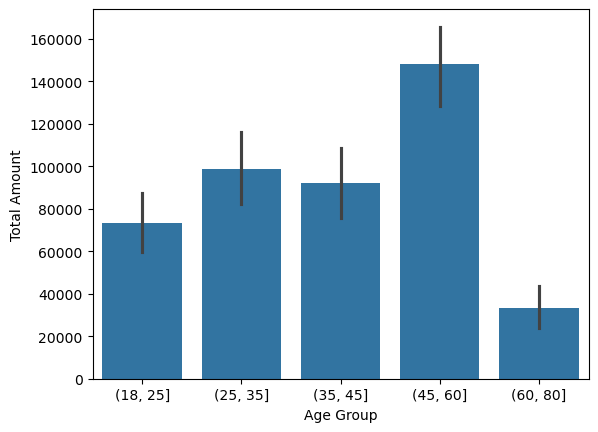

In [33]:
df['Age Group'] = pd.cut(
    df['Age'], [18,25,35,45,60,80]
)

sns.barplot(
    x='Age Group',
    y='Total Amount',
    data=df,
    estimator=sum
)
plt.show()


In [35]:
df.groupby('Product Category')['Total Amount'].sum()


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

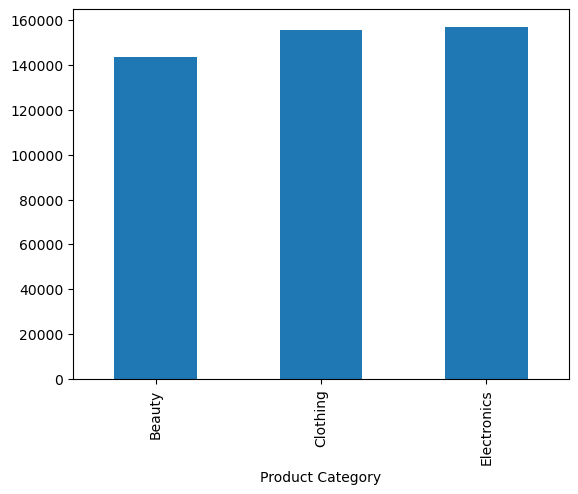

In [37]:
df.groupby('Product Category')['Total Amount'].sum().plot(kind='bar')
plt.show()


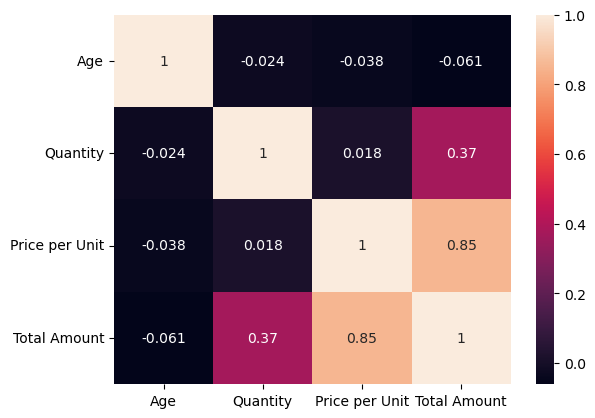

In [39]:
sns.heatmap(
    df[['Age','Quantity','Price per Unit','Total Amount']].corr(),
    annot=True
)
plt.show()
